In [1]:
import pickle
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("../data/processed/ant_behavioral_train_test.pkl", "rb") as f:
    data = pickle.load(f)

X_train, X_test, y_train, y_test = data["X_train"], data["X_test"], data["y_train"], data["y_test"]

In [3]:
# Initialize model
xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb.fit(X_train, y_train)

# Predict
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluate
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.3f}")
print(f"Test  R²: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Train R²: 0.220, RMSE: 0.879
Test  R²: 0.192, RMSE: 0.906


,Feature,Importance
0,trial_type_Incongruent,0.336790
2,prev_trial_type_SpatialCue,0.237743
1,prev_trial_type_NoCue,0.080371
10,run_6,0.050225
7,run_3,0.047698
8,run_4,0.045758
9,run_5,0.045332
6,run_2,0.043529
3,target_dir_Right,0.038975
4,target_pos_Up,0.038609


/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_92835/4142228077.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), y="Feature", x="Importance", palette="mako")


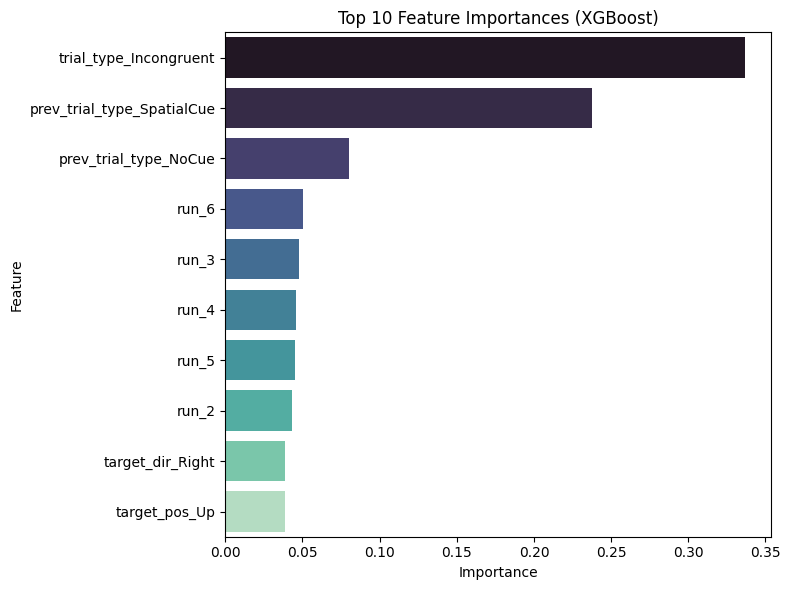

In [4]:
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Top 10
display(feat_imp.head(10))

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(10), y="Feature", x="Importance", palette="mako")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

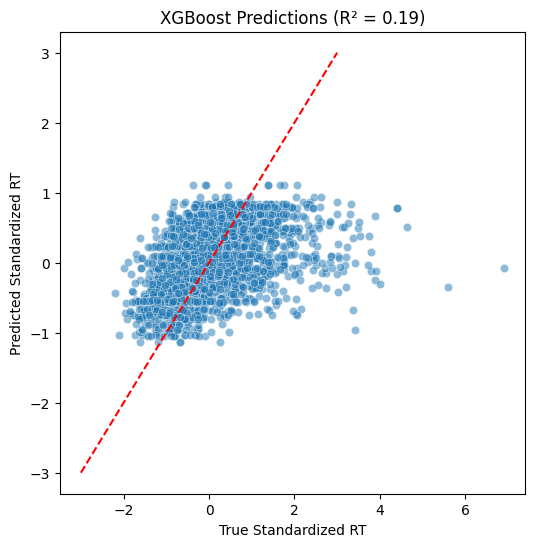

In [5]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.xlabel("True Standardized RT")
plt.ylabel("Predicted Standardized RT")
plt.title(f"XGBoost Predictions (R² = {r2_test:.2f})")
plt.plot([-3,3], [-3,3], "r--")
plt.show()